<a href="https://colab.research.google.com/github/zd2011/foundML/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, mean_squared_error
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

# Setting data and seed

In [ ]:
#setting seed
seed = 12501586
random.seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing data as dataframe
df = pd.read_csv('/content/gdrive/MyDrive/DS/ML/musicData.csv')
df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

# Data Preprocessing

## eliminating null value

In [ ]:
#check null value
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
#check enties that contain null
df[df.isna().any(axis=1)]

instance_id artist_name track_name  popularity  acousticness  \
10000          NaN         NaN        NaN         NaN           NaN   
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10000           NaN          NaN     NaN               NaN  NaN       NaN   
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness tempo obtained_date  valence music_genre  
10000       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10001       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10002       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10003       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10004       NaN  NaN          NaN   NaN           NaN      NaN         NaN

In [ ]:
#drop nan entries
print('original number of entries: {}'.format(len(df)))
df_music_raw = df.dropna()
print('number of entries after dropping 5 NaN entries: {}'.format(len(df_music_raw)))

original number of entries: 50005
number of entries after dropping 5 NaN entries: 50000


## data types and distributions

In [ ]:
 #check variable types
df_music_raw.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [ ]:
#isolate variables not needed for analysis
df_artist = df_music_raw[['instance_id','artist_name','track_name','obtained_date']]
df_music = df_music_raw.drop(['instance_id','artist_name','track_name','obtained_date'], axis = 1)
df_music.head()

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652         -1.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness key  liveness  loudness   mode  speechiness  \
0           0.79200  A#     0.115    -5.201  Minor       0.0748   
1           0.95000   D     0.124    -7.043  Minor       0.0300   
2           0.01180  G#     0.534    -4.617  Major       0.0345   
3           0.00253  C#     0.157    -4.498  Major       0.2390   
4           0.90900  F#     0.157    -6.266  Major       0.0413   

                tempo  valence music_genre  
0             100.889    0.759  Electronic  
1  115.00200000000001    0.531  Electronic  
2             127.994    0.333  Electronic  
3             128.014    0.270  Electronic  
4             145.036    0.323  Electronic

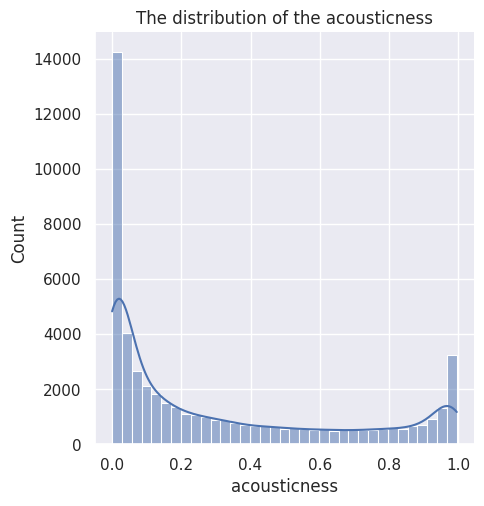

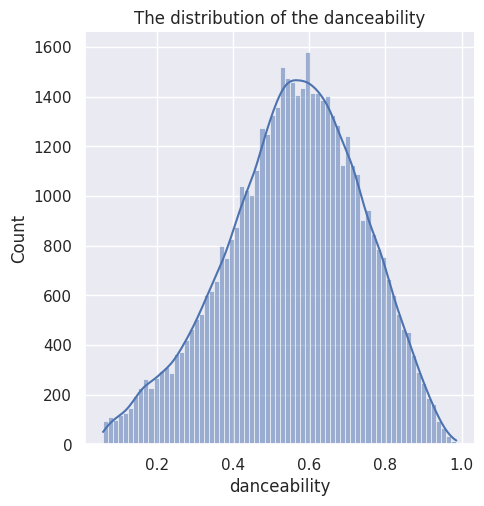

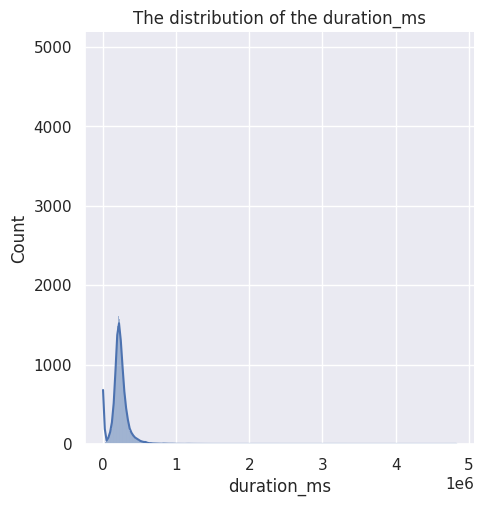

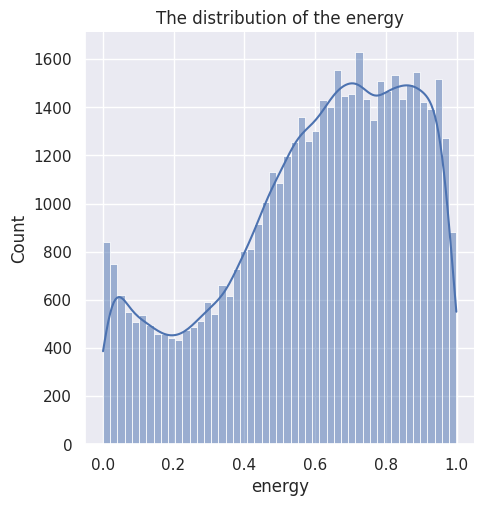

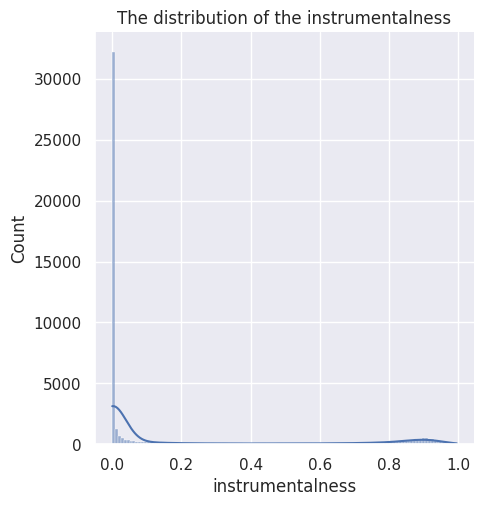

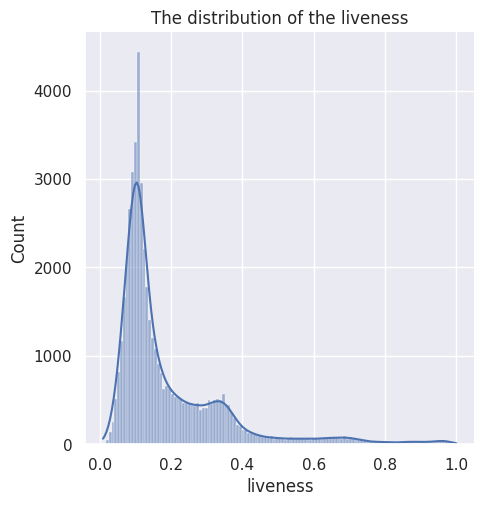

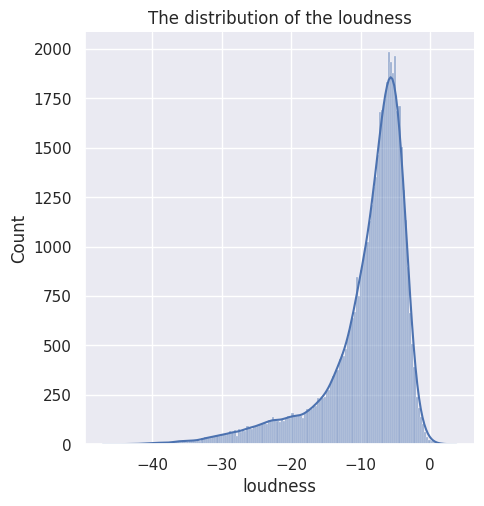

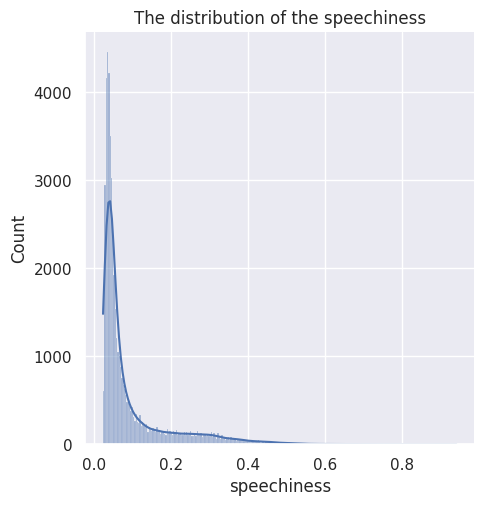

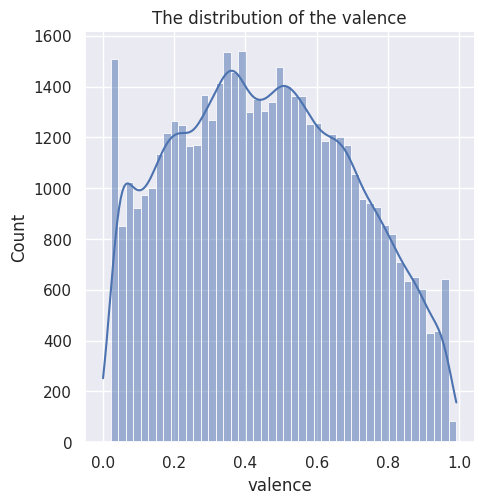

In [ ]:
#plot distribution of numerical variable
sns.set_theme()
for i in df_music.columns[1:]: 
  if df_music[i].dtype == 'float64':
    sns.displot(data = df_music, x = i, kde = True)
    plt.title('The distribution of the {}'.format(i))
    plt.show()

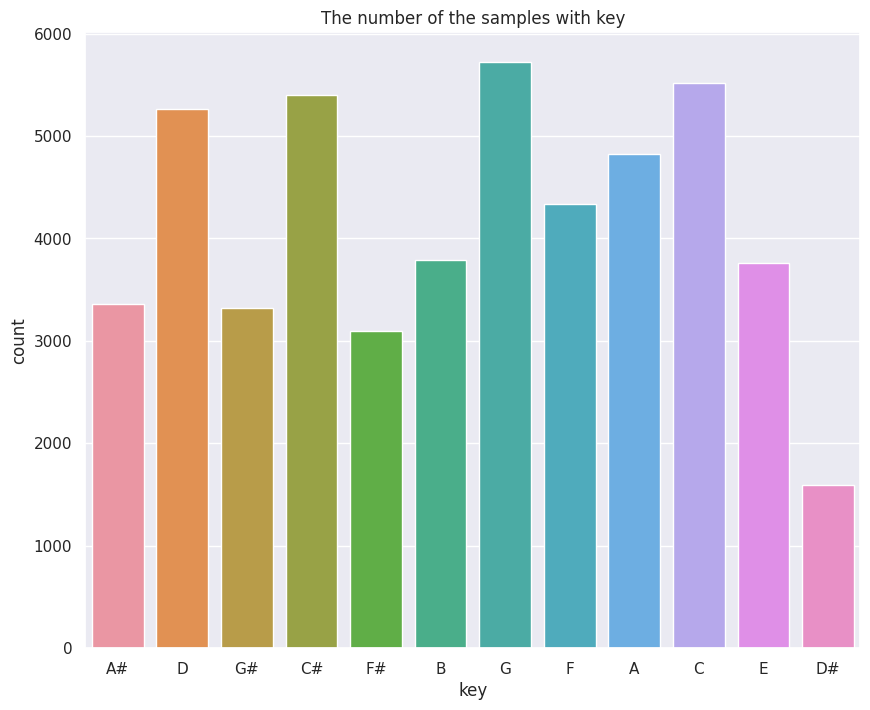

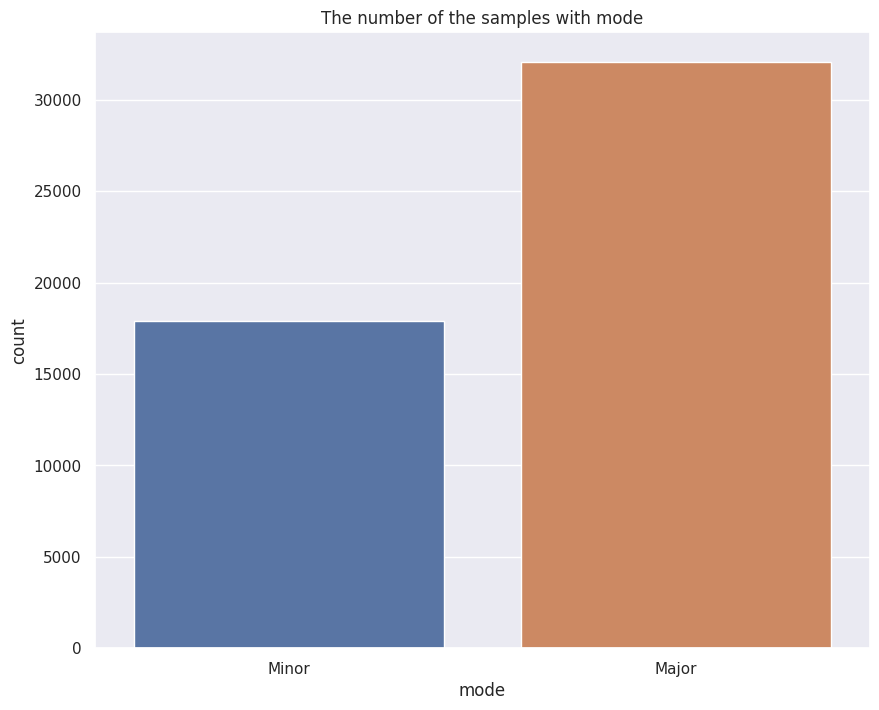

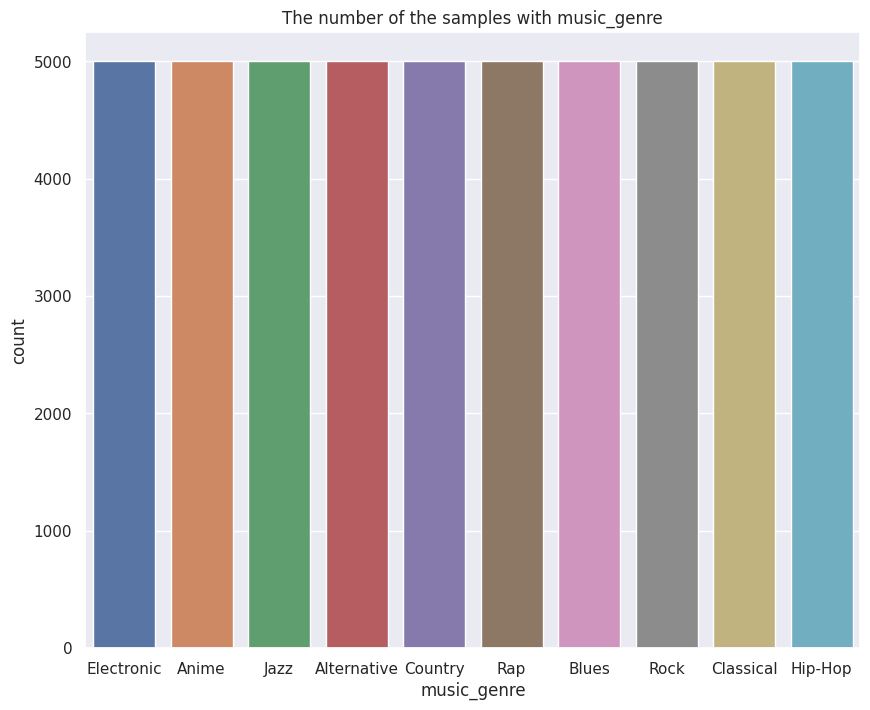

In [ ]:
#plot categorical variable

sns.set_theme()
for i in df_music.columns[:]:
  if i in ['key','mode','music_genre']:
    sns.set(rc={"figure.figsize":(10, 8)})
    sns.countplot(data = df_music, x = i)
    plt.title('The number of the samples with {}'.format(i))
    plt.show()

<ipython-input-14-dc4bea42697d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_music.corr(), annot = True)


<Axes: >

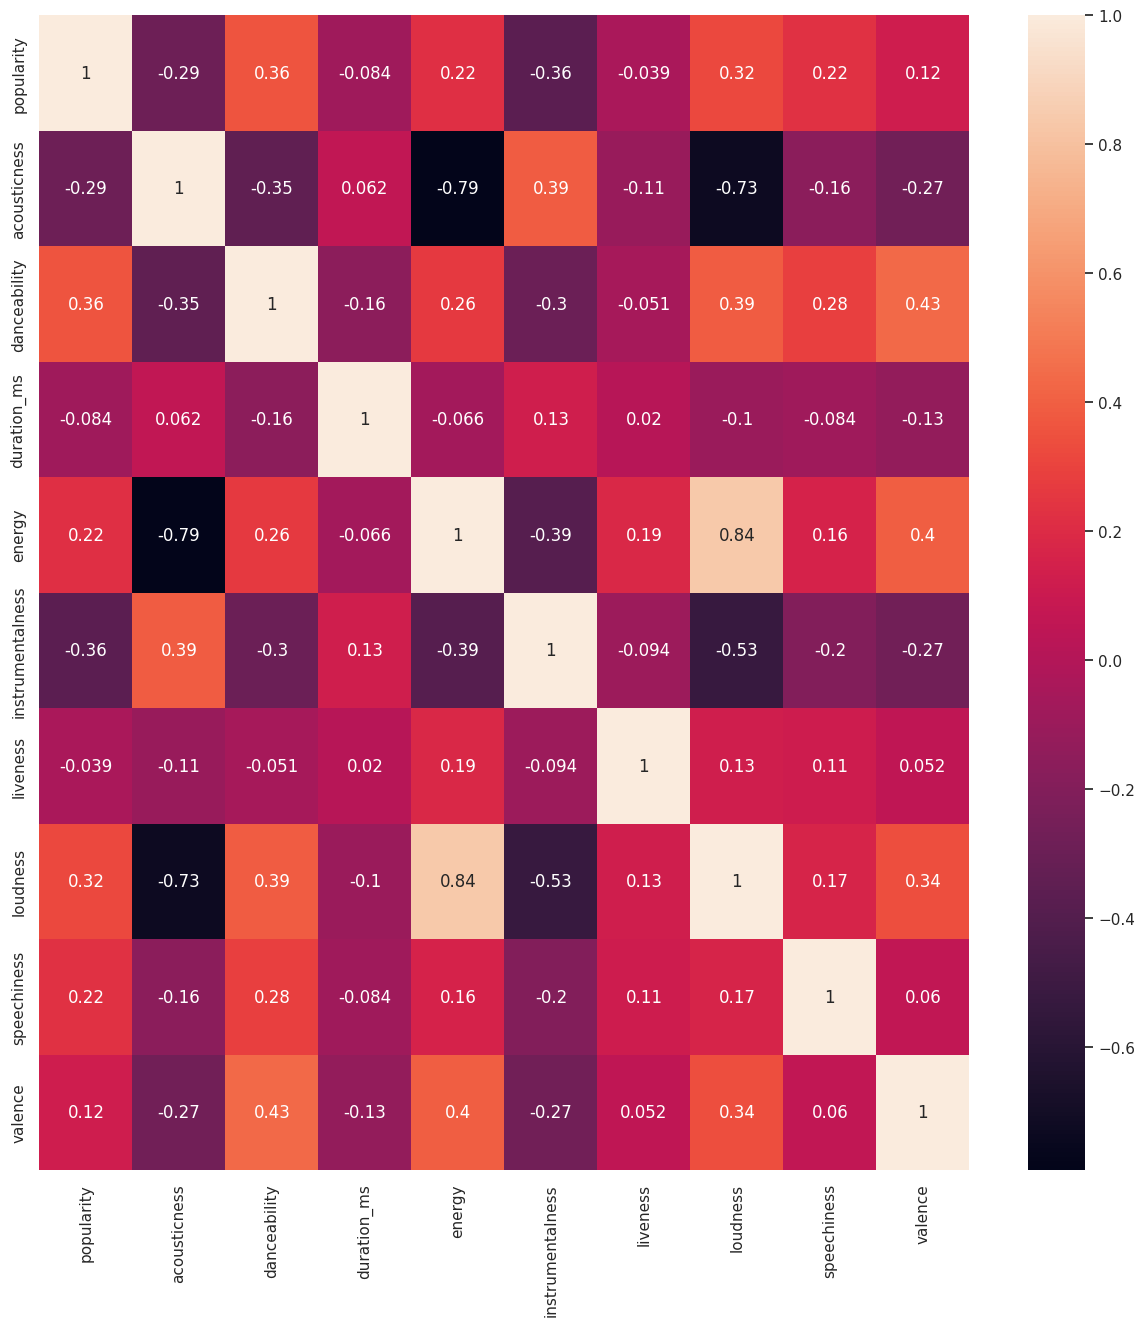

In [ ]:
#heatmap for numerical variables
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(df_music.corr(), annot = True)

## feature encoding

In [ ]:
#encode key and genre into numerical variables
key_encoder = LabelEncoder()
genre_encoder = LabelEncoder()

df_music['key']= key_encoder.fit_transform(df_music['key'])
#save encoding mapping to dictionary for reference
mapping_key = {category: idx for idx, category in enumerate(key_encoder.classes_)}
label_mapping_key = {idx: category for category, idx in mapping_key.items()}

df_music['music_genre']= genre_encoder.fit_transform(df_music['music_genre'])
mapping_genre = {category: idx for idx, category in enumerate(genre_encoder.classes_)}
label_mapping_genre = {idx: category for category, idx in mapping_genre.items()}

df_music.head()

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652         -1.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  key  liveness  loudness   mode  speechiness  \
0           0.79200    1     0.115    -5.201  Minor       0.0748   
1           0.95000    5     0.124    -7.043  Minor       0.0300   
2           0.01180   11     0.534    -4.617  Major       0.0345   
3           0.00253    4     0.157    -4.498  Major       0.2390   
4           0.90900    9     0.157    -6.266  Major       0.0413   

                tempo  valence  music_genre  
0             100.889    0.759            5  
1  115.00200000000001    0.531            5  
2             127.994    0.333            5  
3             128.014    0.270            5  
4             145.036    0.323            5

In [ ]:
#key encode mapping
label_mapping_key

{0: 'A',
 1: 'A#',
 2: 'B',
 3: 'C',
 4: 'C#',
 5: 'D',
 6: 'D#',
 7: 'E',
 8: 'F',
 9: 'F#',
 10: 'G',
 11: 'G#'}

In [ ]:
#genre encode mapping
label_mapping_genre

{0: 'Alternative',
 1: 'Anime',
 2: 'Blues',
 3: 'Classical',
 4: 'Country',
 5: 'Electronic',
 6: 'Hip-Hop',
 7: 'Jazz',
 8: 'Rap',
 9: 'Rock'}

In [ ]:
#one hot encoding
df_music_encoded = pd.get_dummies(df_music, columns = ['mode'])
df_music_encoded.head()

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652         -1.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  key  liveness  loudness  speechiness               tempo  \
0           0.79200    1     0.115    -5.201       0.0748             100.889   
1           0.95000    5     0.124    -7.043       0.0300  115.00200000000001   
2           0.01180   11     0.534    -4.617       0.0345             127.994   
3           0.00253    4     0.157    -4.498       0.2390             128.014   
4           0.90900    9     0.157    -6.266       0.0413             145.036   

   valence  music_genre  mode_Major  mode_Minor  
0    0.759            5           0           1  
1    0.531            5           0           1  
2    0.333            5           1           0  
3    0.270            5           1           0  
4    0.323            5           1           0

## missing value/anomalies imputation

In [ ]:
#check unique values for anomalies
print("No.of.unique values in each column :\n",df_music_encoded.nunique(axis=0))

No.of.unique values in each column :
 popularity             99
acousticness         4193
danceability         1088
duration_ms         26028
energy               2085
instrumentalness     5131
key                    12
liveness             1646
loudness            17247
speechiness          1337
tempo               29394
valence              1615
music_genre            10
mode_Major              2
mode_Minor              2
dtype: int64


In [ ]:
#check max values for anomalies
print("max values in each column :\n",df_music_encoded.max(axis=0))

max values in each column :
 popularity               99.0
acousticness            0.996
danceability            0.986
duration_ms         4830606.0
energy                  0.999
instrumentalness        0.996
key                        11
liveness                  1.0
loudness                3.744
speechiness             0.942
tempo                       ?
valence                 0.992
music_genre                 9
mode_Major                  1
mode_Minor                  1
dtype: object


In [ ]:
#check min values for anomalies
print("min values in each column :\n",df_music_encoded.min(axis=0))

min values in each column :
 popularity               0.0
acousticness             0.0
danceability          0.0596
duration_ms             -1.0
energy              0.000792
instrumentalness         0.0
key                        0
liveness             0.00967
loudness             -47.046
speechiness           0.0223
tempo                  100.0
valence                  0.0
music_genre                0
mode_Major                 0
mode_Minor                 0
dtype: object


In [ ]:
#we see that duration has negative values
df_music_encoded[df_music_encoded.duration_ms <=0]

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652         -1.0   0.941   
13           31.0       0.86000         0.737         -1.0   0.405   
16           59.0       0.13600         0.336         -1.0   0.746   
24           56.0       0.06800         0.725         -1.0   0.877   
35           33.0       0.10800         0.493         -1.0   0.682   
...           ...           ...           ...          ...     ...   
49956        52.0       0.13300         0.867         -1.0   0.618   
49969        47.0       0.01270         0.706         -1.0   0.787   
49979        47.0       0.48300         0.789         -1.0   0.452   
49981        60.0       0.06350         0.594         -1.0   0.823   
50000        59.0       0.03340         0.913         -1.0   0.574   

       instrumentalness  key  liveness  loudness  speechiness  \
0              0.792000    1    0.1150    -5.201       0.0748   
13             0.036100    0    0.1730   -10.536       0.0424   
16             0.000000    4    0.7370    -4.315       0.0685   
24             0.000036    3    0.0900    -3.496       0.0646   
35             0.000000    0    0.1960    -5.781       0.2870   
...                 ...  ...       ...       ...          ...   
49956          0.000002    2    0.1280    -4.956       0.0614   
49969          0.000000    0    0.2650    -5.314       0.0888   
49979          0.000000    2    0.0892    -7.538       0.4800   
49981          0.000000    0    0.0950    -5.210       0.3320   
50000          0.000000    4    0.1190    -7.022       0.2980   

                   tempo  valence  music_genre  mode_Major  mode_Minor  
0                100.889   0.7590            5           0           1  
13               154.745   0.6470            5           0           1  
16               151.756   0.2100            5           0           1  
24               105.919   0.0977            5           1           0  
35                     ?   0.2390            5           0           1  
...                  ...      ...          ...         ...         ...  
49956            140.005   0.8570            6           0           1  
49969             85.963   0.2430            6           1           0  
49979            140.101   0.2840            6           0           1  
49981             97.101   0.6630            6           1           0  
50000  98.02799999999999   0.3300            6           1           0  

[4939 rows x 15 columns]

In [ ]:
#impute -1 duration with median duration
imputer = SimpleImputer(missing_values = -1, strategy ='median')
df_music_encoded['duration_ms'] = imputer.fit_transform(df_music_encoded['duration_ms'].values.reshape(-1,1))
df_music_encoded.head()

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652     227360.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  key  liveness  loudness  speechiness               tempo  \
0           0.79200    1     0.115    -5.201       0.0748             100.889   
1           0.95000    5     0.124    -7.043       0.0300  115.00200000000001   
2           0.01180   11     0.534    -4.617       0.0345             127.994   
3           0.00253    4     0.157    -4.498       0.2390             128.014   
4           0.90900    9     0.157    -6.266       0.0413             145.036   

   valence  music_genre  mode_Major  mode_Minor  
0    0.759            5           0           1  
1    0.531            5           0           1  
2    0.333            5           1           0  
3    0.270            5           1           0  
4    0.323            5           1           0

In [ ]:
#we also see that tempo has ?
df_music_encoded[df_music_encoded.tempo == '?']

popularity  acousticness  danceability  duration_ms  energy  \
5            47.0       0.00523         0.755     519468.0   0.731   
32           45.0       0.02330         0.729     274286.0   0.869   
35           33.0       0.10800         0.493     227360.0   0.682   
36           45.0       0.04780         0.646     253333.0   0.649   
39           37.0       0.20300         0.769     429941.0   0.551   
...           ...           ...           ...          ...     ...   
49918        58.0       0.29600         0.379     292520.0   0.644   
49964        59.0       0.08470         0.929     215200.0   0.737   
49967        62.0       0.17900         0.860     233293.0   0.625   
49976        52.0       0.70000         0.462     225067.0   0.741   
49977        58.0       0.10500         0.905     240627.0   0.414   

       instrumentalness  key  liveness  loudness  speechiness tempo  valence  \
5              0.854000    5    0.2160   -10.517       0.0412     ?   0.6140   
32             0.585000    8    0.0944    -7.569       0.1290     ?   0.1380   
35             0.000000    0    0.1960    -5.781       0.2870     ?   0.2390   
36             0.002520   10    0.3530    -5.259       0.1170     ?   0.7270   
39             0.882000    1    0.1090   -12.520       0.0408     ?   0.0618   
...                 ...  ...       ...       ...          ...   ...      ...   
49918          0.000000    1    0.3130    -7.933       0.1120     ?   0.1440   
49964          0.000000   11    0.8610    -6.424       0.1020     ?   0.8860   
49967          0.000136    5    0.3000    -6.922       0.1050     ?   0.2210   
49976          0.000000    1    0.3400    -8.008       0.1620     ?   0.5890   
49977          0.000366   11    0.0914    -8.112       0.0615     ?   0.7580   

       music_genre  mode_Major  mode_Minor  
5                5           0           1  
32               5           0           1  
35               5           0           1  
36               5           1           0  
39               5           0           1  
...            ...         ...         ...  
49918            6           0           1  
49964            6           1           0  
49967            6           1           0  
49976            6           0           1  
49977            6           0           1  

[4980 rows x 15 columns]

In [ ]:
#replace ? with nan before imputation
df_music_encoded.tempo.replace('?', np.nan, inplace = True)

In [ ]:
#also impute ? with median tempo
imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
df_music_encoded['tempo'] = imputer.fit_transform(df_music_encoded['tempo'].values.reshape(-1,1))
df_music_encoded.head()

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652     227360.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  key  liveness  loudness  speechiness    tempo  valence  \
0           0.79200    1     0.115    -5.201       0.0748  100.889    0.759   
1           0.95000    5     0.124    -7.043       0.0300  115.002    0.531   
2           0.01180   11     0.534    -4.617       0.0345  127.994    0.333   
3           0.00253    4     0.157    -4.498       0.2390  128.014    0.270   
4           0.90900    9     0.157    -6.266       0.0413  145.036    0.323   

   music_genre  mode_Major  mode_Minor  
0            5           0           1  
1            5           0           1  
2            5           1           0  
3            5           1           0  
4            5           1           0

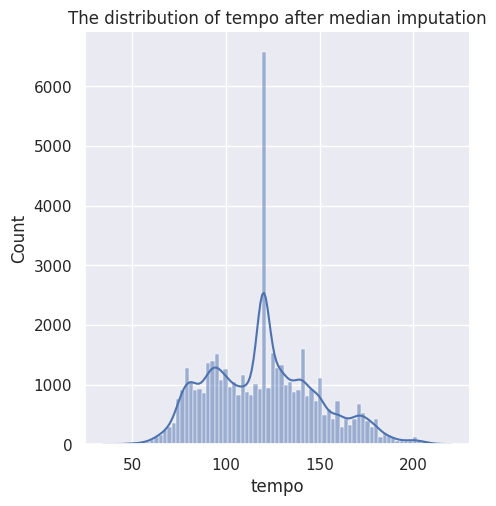

In [ ]:
#no distribution plotted for tempo due to ?
#new distribution after imputation
sns.displot(data = df_music_encoded, x = 'tempo', kde = True)
plt.title('The distribution of tempo after median imputation')
plt.show()

# Dimensionality reduction

## standarize data

In [ ]:
#isolate numerical variables for standardization
num_col = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
             'instrumentalness', 'liveness', 'loudness', 'speechiness','tempo', 'valence']

scaler = StandardScaler()
df_music_encoded[num_col] = scaler.fit_transform(df_music_encoded[num_col])
df_music_encoded.head()

popularity  acousticness  danceability  duration_ms    energy  \
0   -1.108003     -0.883886      0.524878    -0.154369  1.289876   
1   -0.850633     -0.860390      0.356933    -0.239968  1.097101   
2   -1.043661     -0.888632      0.345737    -0.265269  0.586813   
3   -0.657606     -0.823184      1.207853    -0.725393  0.378918   
4   -0.786291     -0.883974      0.446504    -0.201488 -0.048212   

   instrumentalness  key  liveness  loudness  speechiness     tempo   valence  \
0          1.875809    1 -0.488113  0.638132    -0.185322 -0.655420  1.225073   
1          2.361357    5 -0.432433  0.339248    -0.627258 -0.170027  0.302431   
2         -0.521812   11  2.104140  0.732892    -0.582867  0.276811 -0.498812   
3         -0.550300    4 -0.228269  0.752201     1.434452  0.277499 -0.753752   
4          2.235361    9 -0.228269  0.465324    -0.515787  0.862942 -0.539278   

   music_genre  mode_Major  mode_Minor  
0            5           0           1  
1            5           0           1  
2            5           1           0  
3            5           1           0  
4            5           1           0

In [ ]:
df_std = df_music_encoded.copy()
df_std.head()

popularity  acousticness  danceability  duration_ms    energy  \
0   -1.108003     -0.883886      0.524878    -0.154369  1.289876   
1   -0.850633     -0.860390      0.356933    -0.239968  1.097101   
2   -1.043661     -0.888632      0.345737    -0.265269  0.586813   
3   -0.657606     -0.823184      1.207853    -0.725393  0.378918   
4   -0.786291     -0.883974      0.446504    -0.201488 -0.048212   

   instrumentalness  key  liveness  loudness  speechiness     tempo   valence  \
0          1.875809    1 -0.488113  0.638132    -0.185322 -0.655420  1.225073   
1          2.361357    5 -0.432433  0.339248    -0.627258 -0.170027  0.302431   
2         -0.521812   11  2.104140  0.732892    -0.582867  0.276811 -0.498812   
3         -0.550300    4 -0.228269  0.752201     1.434452  0.277499 -0.753752   
4          2.235361    9 -0.228269  0.465324    -0.515787  0.862942 -0.539278   

   music_genre  mode_Major  mode_Minor  
0            5           0           1  
1            5           0           1  
2            5           1           0  
3            5           1           0  
4            5           1           0

## PCA

In [ ]:
cat_col = ['key', 'mode_Major', 'mode_Minor', 'music_genre']
df_pca = df_std.drop(cat_col, axis = 1)
df_pca.head()

popularity  acousticness  danceability  duration_ms    energy  \
0   -1.108003     -0.883886      0.524878    -0.154369  1.289876   
1   -0.850633     -0.860390      0.356933    -0.239968  1.097101   
2   -1.043661     -0.888632      0.345737    -0.265269  0.586813   
3   -0.657606     -0.823184      1.207853    -0.725393  0.378918   
4   -0.786291     -0.883974      0.446504    -0.201488 -0.048212   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  
0          1.875809 -0.488113  0.638132    -0.185322 -0.655420  1.225073  
1          2.361357 -0.432433  0.339248    -0.627258 -0.170027  0.302431  
2         -0.521812  2.104140  0.732892    -0.582867  0.276811 -0.498812  
3         -0.550300 -0.228269  0.752201     1.434452  0.277499 -0.753752  
4          2.235361 -0.228269  0.465324    -0.515787  0.862942 -0.539278

In [ ]:
#PCA showing first 4 principal components
pca = PCA(n_components= 4, whiten=True)
#fitting standardized data
pca_data = pca.fit(df_pca)

In [ ]:
#first 4 dimention of components
X_pca = pca.transform(df_pca)
df_pca = pd.DataFrame(X_pca, columns= ['component_1', 'component_2', 'component_3',
                                       'component_4'])
df_pca.head()

component_1  component_2  component_3  component_4
0    -0.344795     0.478766    -1.405934    -0.657792
1    -0.019058     0.754880    -1.350895    -0.347737
2    -0.518279     1.422034     0.659993    -1.160761
3    -0.725142    -0.395478     0.571661    -0.227547
4     0.187354     0.845816    -0.882527    -0.175682

3 eigenvalues above 1


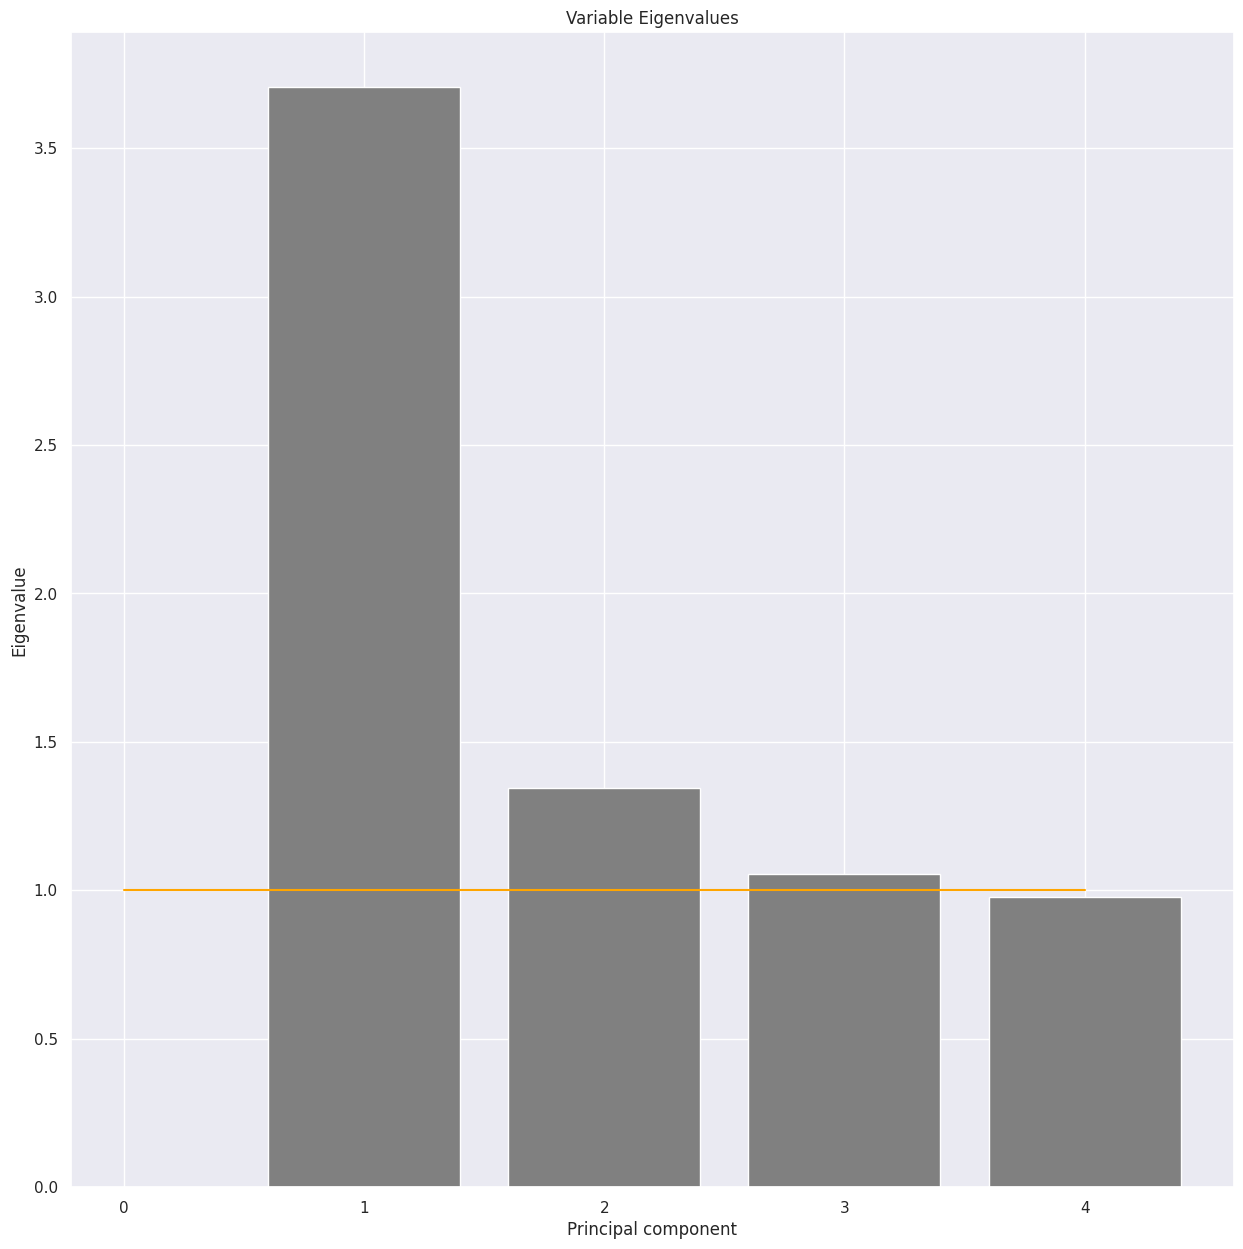

In [ ]:
#get eigenvalues for each principal component
eigVals = pca_data.explained_variance_

eigVals_above_1 = eigVals[eigVals > 1]
#
num_eigVals_above_1 = len(eigVals_above_1)

print("{} eigenvalues above 1".format(num_eigVals_above_1))

#plotting first 4 principal components
num_variable = 4
x_variables = np.linspace(1,num_variable,num_variable)
plt.bar(x_variables, eigVals, color='gray')
plt.plot([0,num_variable],[1,1],color='orange')
plt.title("Variable Eigenvalues")
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
df_pca[cat_col] = df_std[cat_col].values
df_pca.head()

component_1  component_2  component_3  component_4  key  mode_Major  \
0    -0.344795     0.478766    -1.405934    -0.657792    1           0   
1    -0.019058     0.754880    -1.350895    -0.347737    5           0   
2    -0.518279     1.422034     0.659993    -1.160761   11           1   
3    -0.725142    -0.395478     0.571661    -0.227547    4           1   
4     0.187354     0.845816    -0.882527    -0.175682    9           1   

   mode_Minor  music_genre  
0           1            5  
1           1            5  
2           0            5  
3           0            5  
4           0            5

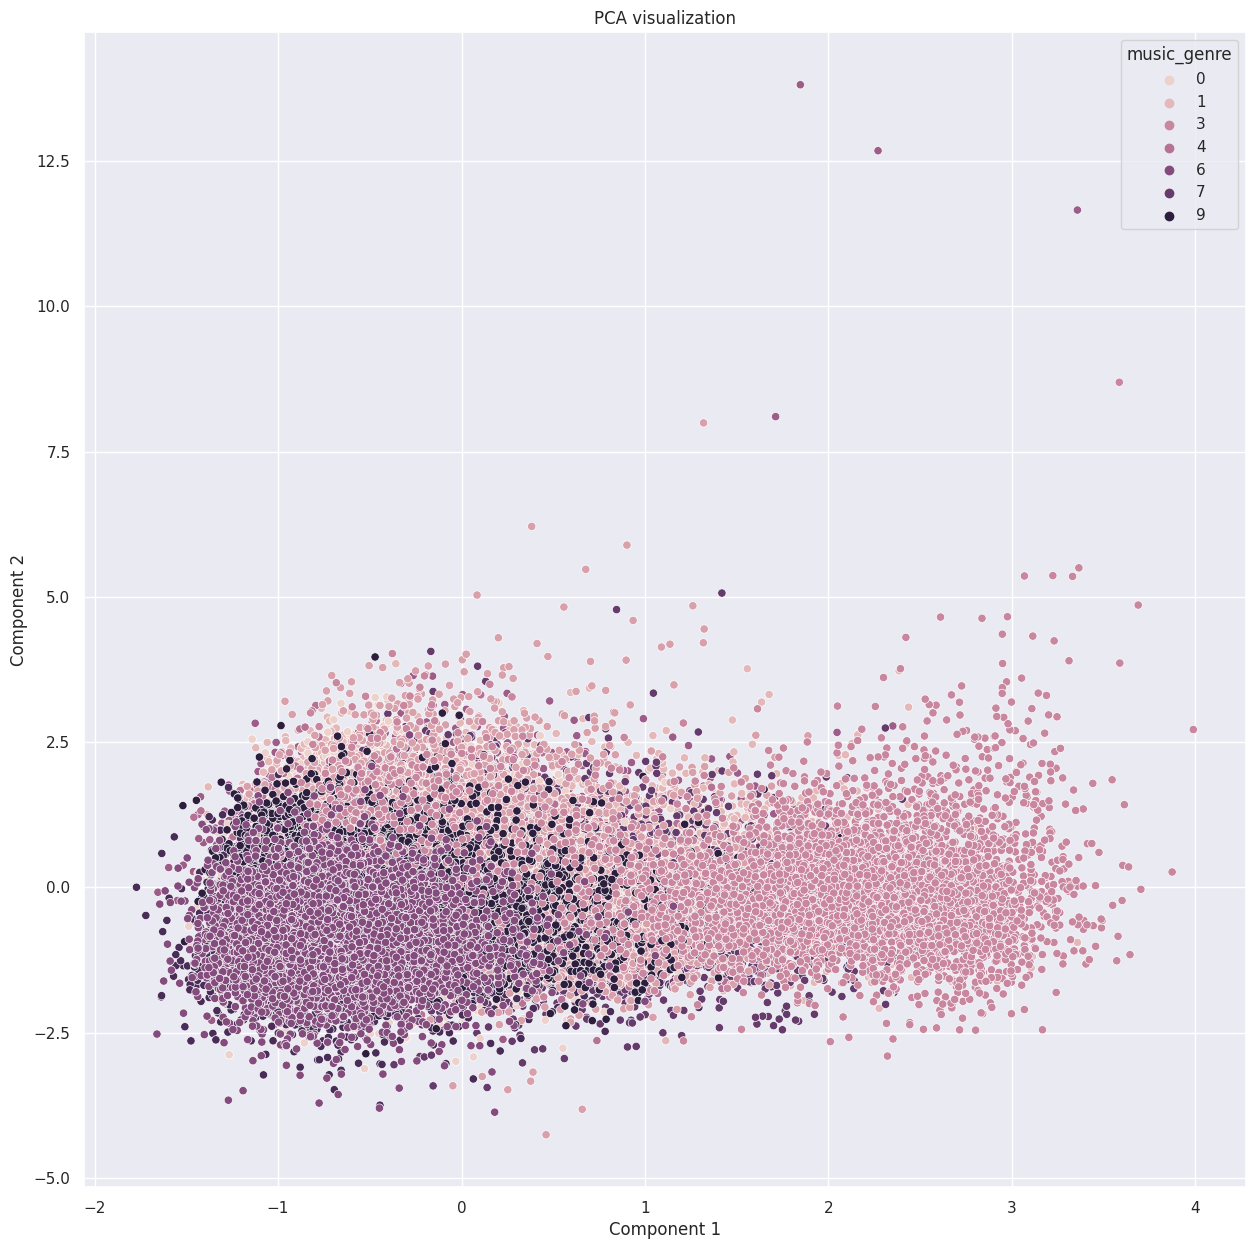

In [ ]:
#showing frist 2 components and reduced dimensions
sns.scatterplot(data=df_pca, x='component_1', y='component_2', hue = 'music_genre')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA visualization')
plt.show()

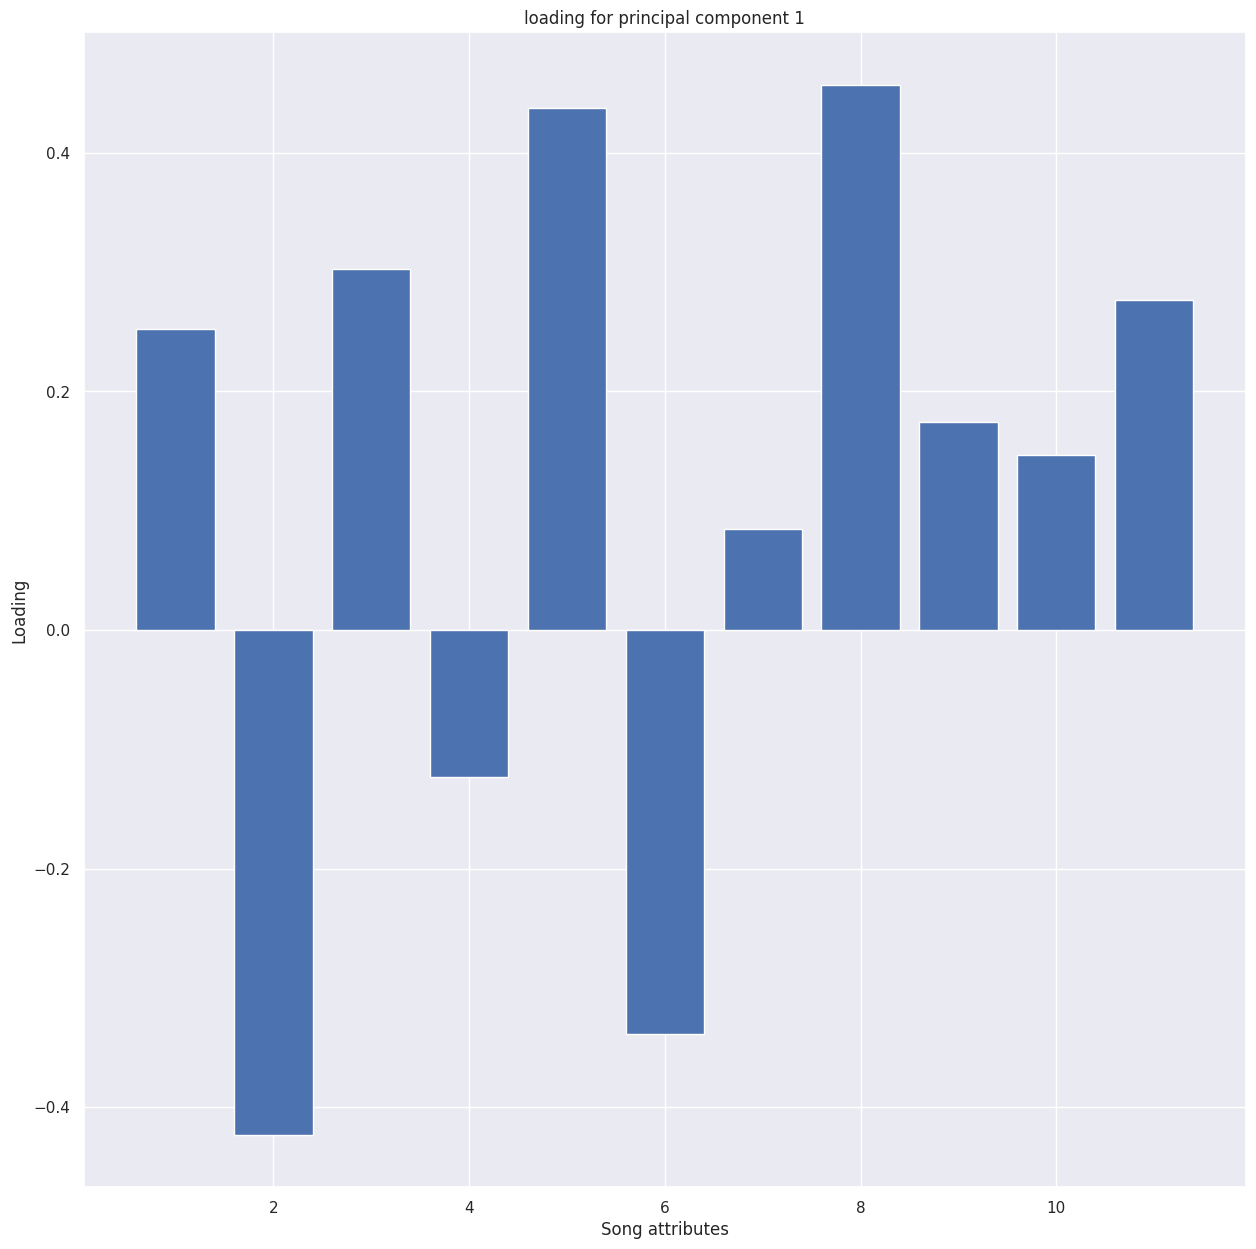

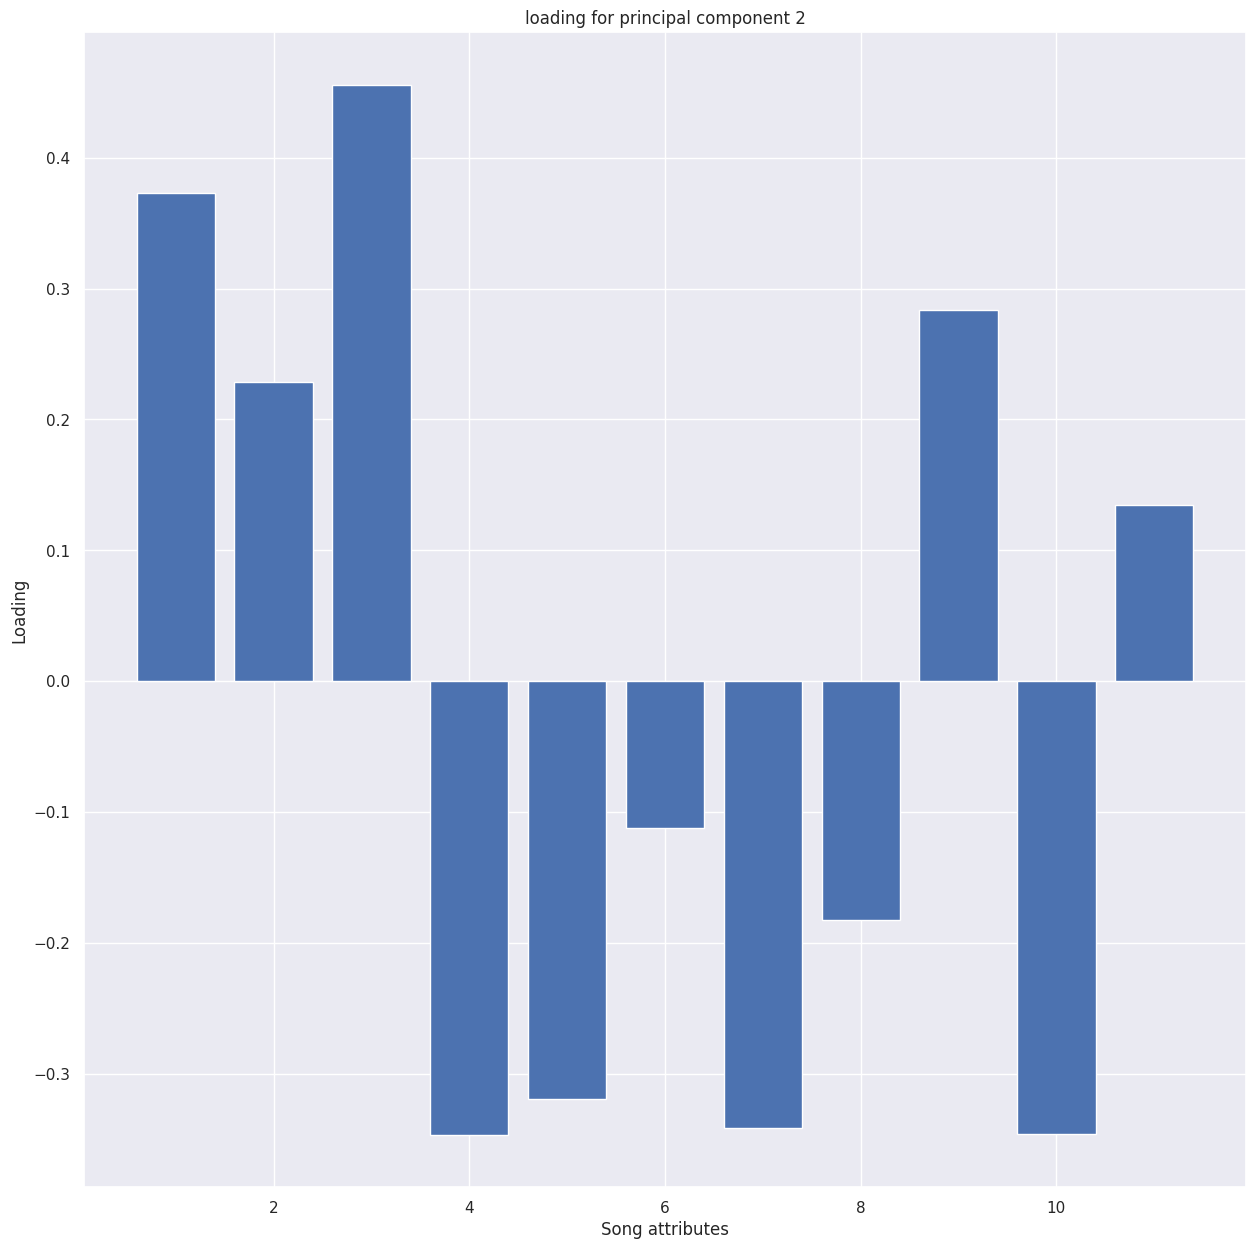

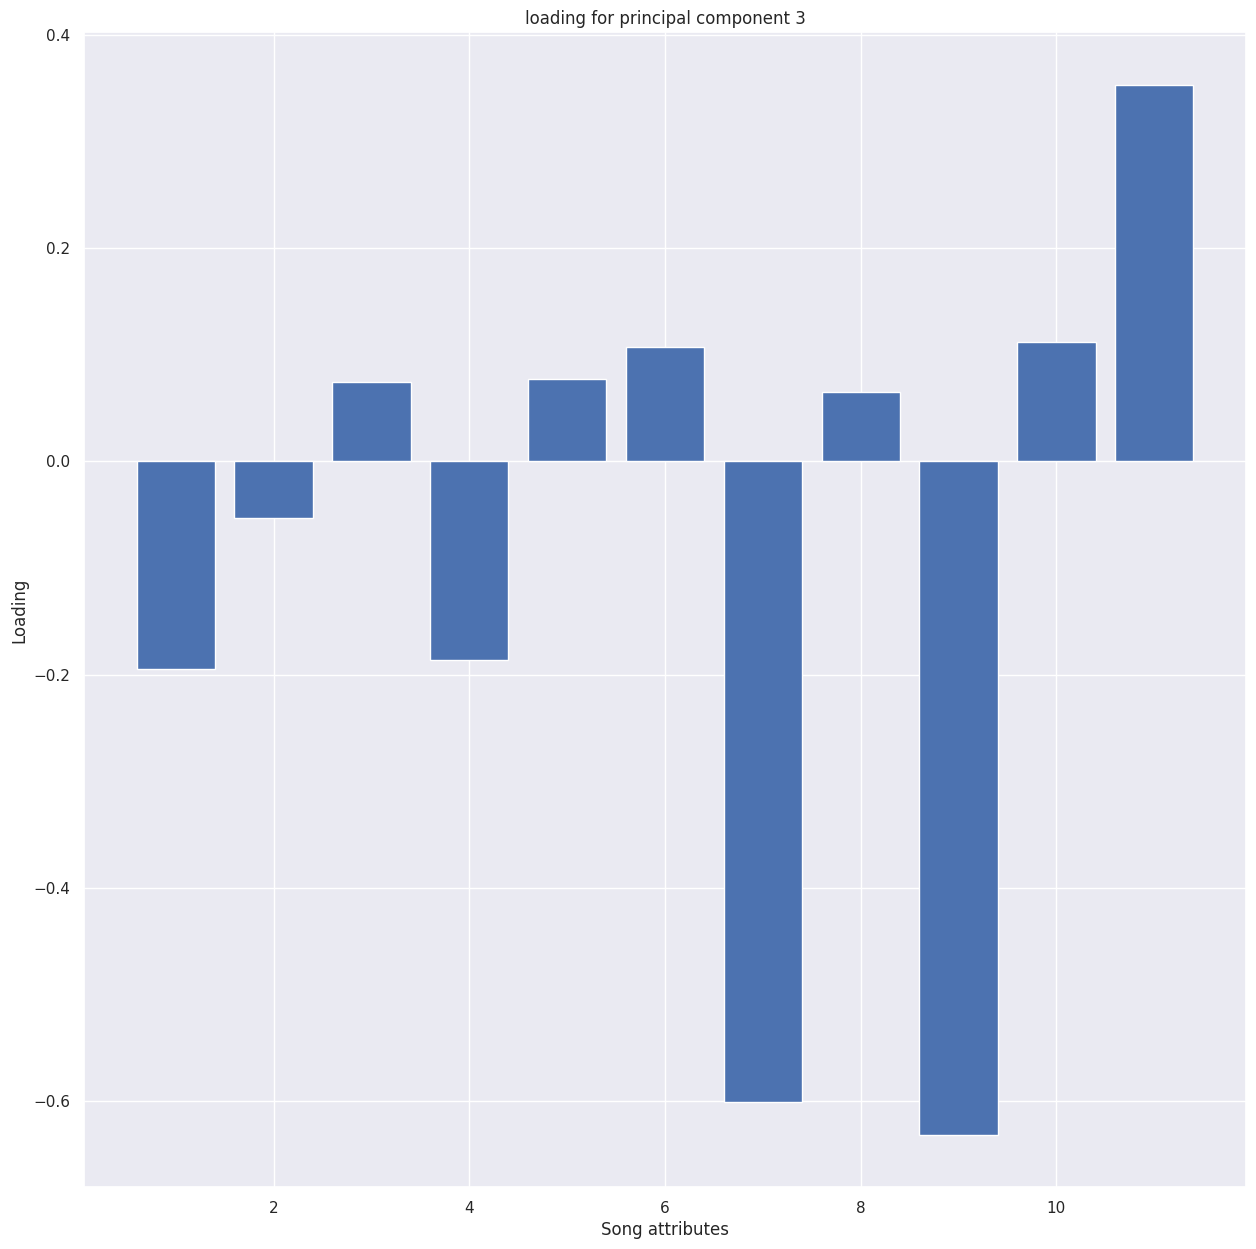

In [ ]:
#get loadings for each principal components
loadings = pca.components_
for i in [0,1,2]: 
  attr = np.linspace(1,11,11)
  plt.bar(attr,loadings[i,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
  plt.xlabel('Song attributes')
  plt.ylabel('Loading')
  plt.title('loading for principal component {}'.format(i+1))
  plt.show() # Show bar plot

## t-SNE

In [ ]:
#tsne with perplexity 20
df_std_dr = df_std.drop('music_genre', axis = 1)
tsne = TSNE(n_components=2, perplexity=30, n_jobs=-1)
X_tsne = tsne.fit_transform(df_std_dr)

df_tsne = pd.DataFrame(X_tsne, columns= ['component_1', 'component_2'])
df_tsne.head()

component_1  component_2
0   -34.798851    44.908073
1     5.095655    43.683147
2    68.657631   -12.419137
3   -13.869194   -74.179680
4    45.522327    48.439869

In [ ]:
df_tsne['music_genre'] = df_std['music_genre'].values

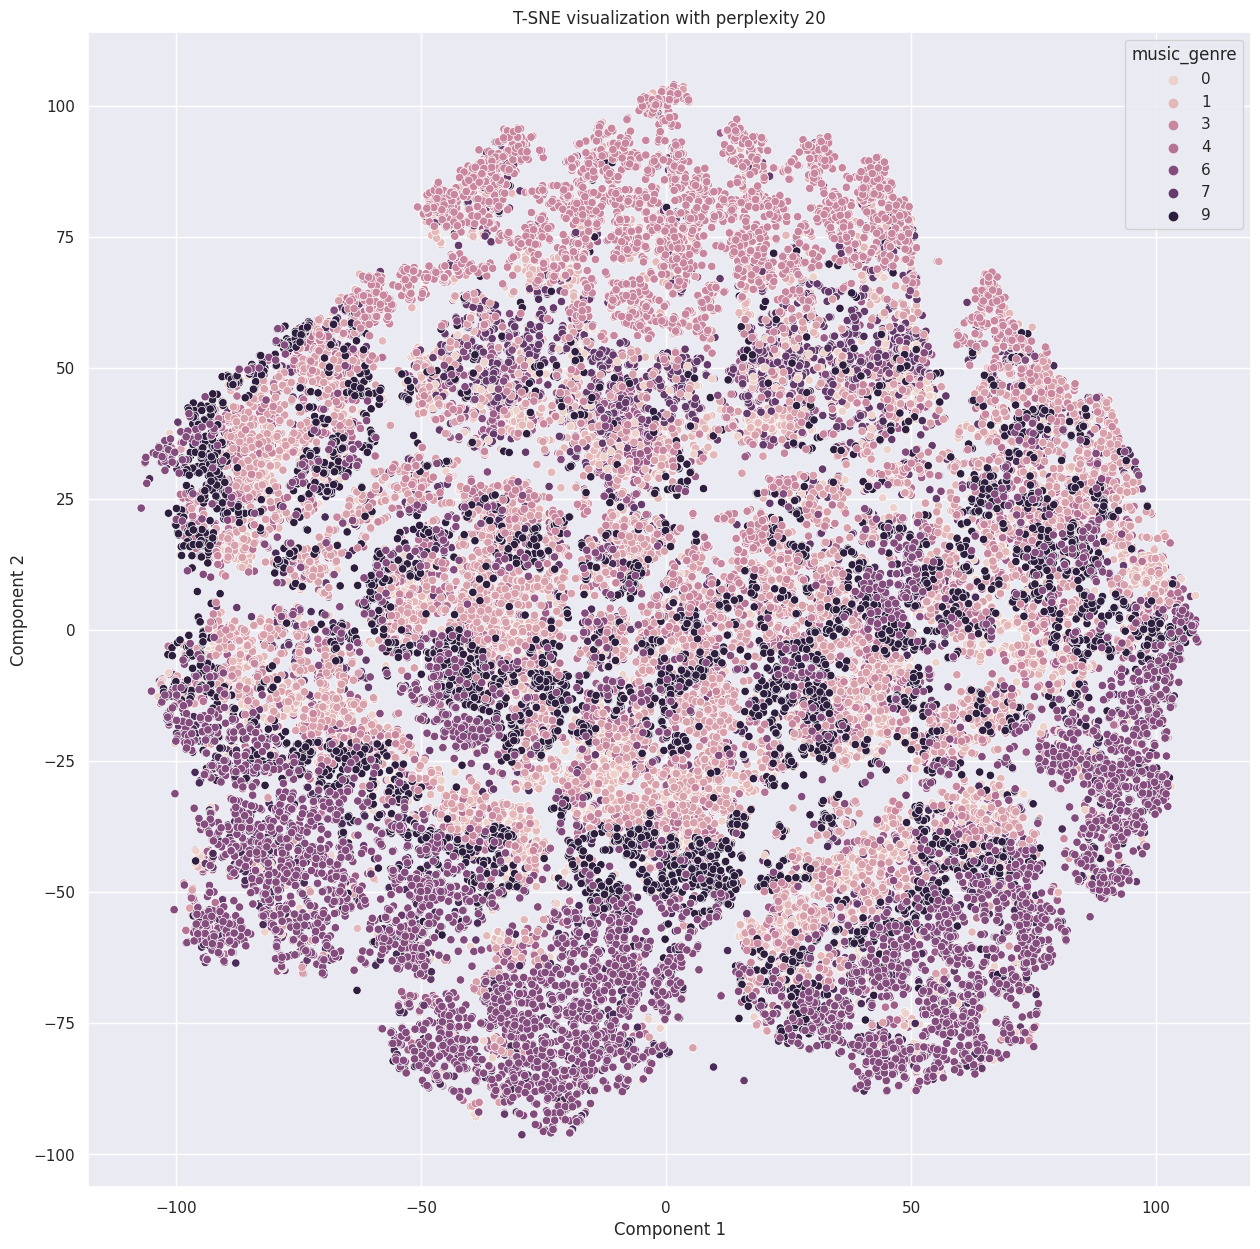

In [ ]:
#tsne with perplexity 20 visualization 
sns.scatterplot(data=df_tsne, x='component_1', y='component_2',hue = 'music_genre')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('T-SNE visualization with perplexity 20')
plt.show()

In [ ]:
df_tsne.head()

component_1  component_2  music_genre
0   -34.798851    44.908073            5
1     5.095655    43.683147            5
2    68.657631   -12.419137            5
3   -13.869194   -74.179680            5
4    45.522327    48.439869            5

## test-train split

In [ ]:
#initialize test train split
X_train = pd.DataFrame()
X_test = pd.DataFrame()

In [ ]:
#splitting according to specified amount
test_size = 500
train_size = 4500
#iterate over all genre
for i in range(10):
    df_genre = df_std[df_std['music_genre'] == i]
    i_train, i_test = train_test_split(df_genre, train_size=train_size, 
                                       test_size=test_size, random_state=seed)
    X_train = X_train.append(i_train, ignore_index=True)
    X_test = X_test.append(i_test, ignore_index=True)

<ipython-input-62-f090ff25d5f8>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(i_train, ignore_index=True)
<ipython-input-62-f090ff25d5f8>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(i_test, ignore_index=True)


In [ ]:
X_train.head()

popularity  acousticness  danceability  duration_ms    energy  \
0    0.886611      1.528161     -1.328112     0.043132 -1.435439   
1    0.629242      1.144376      0.127409     0.339137 -0.815534   
2    0.050160      1.651207      0.379326    -0.341220 -0.437543   
3   -0.014182     -0.223775     -0.174892    -0.044856  0.715330   
4    0.050160     -0.884882      0.580860     0.077996 -0.086011   

   instrumentalness  key  liveness  loudness  speechiness     tempo   valence  \
0         -0.545844   10 -0.659487 -0.563732    -0.575962 -0.002290 -0.628305   
1          1.940344    0 -0.649588 -0.334458    -0.591745 -1.462871 -1.657780   
2         -0.547257    0 -0.525234 -0.038657    -0.544395  0.961995 -0.741612   
3         -0.558074    9  0.136749  0.500048    -0.506909  0.416036 -0.547372   
4         -0.558074    2  0.130563  0.628721    -0.417141 -0.101068 -0.381458   

   music_genre  mode_Major  mode_Minor  
0            0           0           1  
1            0           1           0  
2            0           1           0  
3            0           0           1  
4            0           0           1

In [ ]:
X_test.head()

popularity  acousticness  danceability  duration_ms    energy  \
0    0.178845     -0.897070     -0.829876    -0.263504  0.178583   
1   -0.078525      1.654136      0.776795    -0.491970 -0.773955   
2    0.950954      1.340663      0.950338    -0.154369 -0.199408   
3    0.693584     -0.858340      0.541673    -0.251542  0.099205   
4    0.178845     -0.897491     -0.499585    -0.154369  1.112220   

   instrumentalness  key  liveness  loudness  speechiness     tempo   valence  \
0         -0.554387   10  0.013014  0.240431    -0.556232  1.927656 -1.174607   
1         -0.558023    2  0.792546  0.237997    -0.518747 -1.545106  0.614025   
2         -0.557940    1 -0.651444  0.643973    -0.364858 -0.002290  0.318617   
3         -0.558074    9  0.959589  0.321075    -0.479288  0.484341  0.168890   
4          1.086026   11  1.968031  0.673829    -0.422073 -0.002290  0.079863   

   music_genre  mode_Major  mode_Minor  
0            0           0           1  
1            0           0           1  
2            0           0           1  
3            0           0           1  
4            0           1           0

In [ ]:
#isolate label
y_train = X_train.music_genre
y_test = X_test.music_genre

X_train = X_train.drop('music_genre', axis = 1)
X_test = X_test.drop('music_genre', axis = 1)

In [ ]:
#initialize test train split: t-sne
X_train_pca = pd.DataFrame()
X_test_pca = pd.DataFrame()

In [ ]:
#iterate over all genre
for i in range(10):
    df_genre = df_pca[df_pca['music_genre'] == i]
    i_train, i_test = train_test_split(df_genre, train_size=train_size, 
                                       test_size=test_size, random_state=seed)
    X_train_pca = X_train_pca.append(i_train, ignore_index=True)
    X_test_pca = X_test_pca.append(i_test, ignore_index=True)

<ipython-input-67-1b1aeb1cbfbf>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_pca = X_train_pca.append(i_train, ignore_index=True)
<ipython-input-67-1b1aeb1cbfbf>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test_pca = X_test_pca.append(i_test, ignore_index=True)


In [ ]:
#drop label
X_train_pca = X_train_pca.drop('music_genre', axis = 1)
X_test_pca = X_test_pca.drop('music_genre', axis = 1)

In [ ]:
X_train_pca.head()

component_1  component_2  component_3  component_4  key  mode_Major  \
0     0.967445    -0.568269     0.029627     0.763931   10           0   
1     1.208670    -0.754556     0.097648     1.236115    0           1   
2     0.393045    -0.420381    -0.394299     0.044610    0           1   
3    -0.315455     0.676454    -0.126256     0.271570    9           0   
4    -0.420772     0.128745    -0.077581     0.434769    2           0   

   mode_Minor  
0           1  
1           0  
2           0  
3           1  
4           1

In [ ]:
X_test_pca.head()

component_1  component_2  component_3  component_4  key  mode_Major  \
0    -0.230477     1.249596    -0.111338     0.483926   10           0   
1     0.283431    -1.153854     0.127872    -1.037833    2           0   
2    -0.178846    -1.136778    -0.530279     0.379646    1           0   
3    -0.637697     0.205445     0.188135    -0.200020    9           0   
4    -0.433678     1.457265     0.620606    -0.801245   11           1   

   mode_Minor  
0           1  
1           1  
2           1  
3           1  
4           0

# Random Forest model

### standardized data

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, random_state=seed, n_jobs = -1)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# See the percentage of examples that are correctly classified.
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy = {:0.2f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix = ")
print(conf_matrix)

Accuracy = 53.78%
Confusion matrix = 
[[190   3  10   2  58  23  38  41  33 102]
 [ 13 375  27  35  17  24   0   8   0   1]
 [ 27  48 256  10  53  27   1  54   0  24]
 [ 13  15  12 426   1   9   0  23   0   1]
 [ 38   8  28   0 280  11   7  23   9  96]
 [ 26  14  31   4  11 299  11  82   6  16]
 [ 26   0   1   0   6   5 171   4 270  17]
 [ 13  10  65  24  36  63  14 258   5  12]
 [ 14   0   1   0   7   3 282   1 144  48]
 [ 72   1  16   2  59   1  14   6  39 290]]


In [ ]:
#prob distribution of prediction
pred_probs_std = clf.predict_proba(X_test)

In [ ]:
#get one vs rest auc score, fpr, tpr for roc curve
def roc_curve_ovr(pred_probs, y_test):
  #binarize test data
  y_test_bi = label_binarize(y_test, classes=np.unique(y_test))

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  return fpr,tpr,roc_auc

In [ ]:
fpr_std, tpr_std, roc_auc_std = roc_curve_ovr(pred_probs_std, y_test)

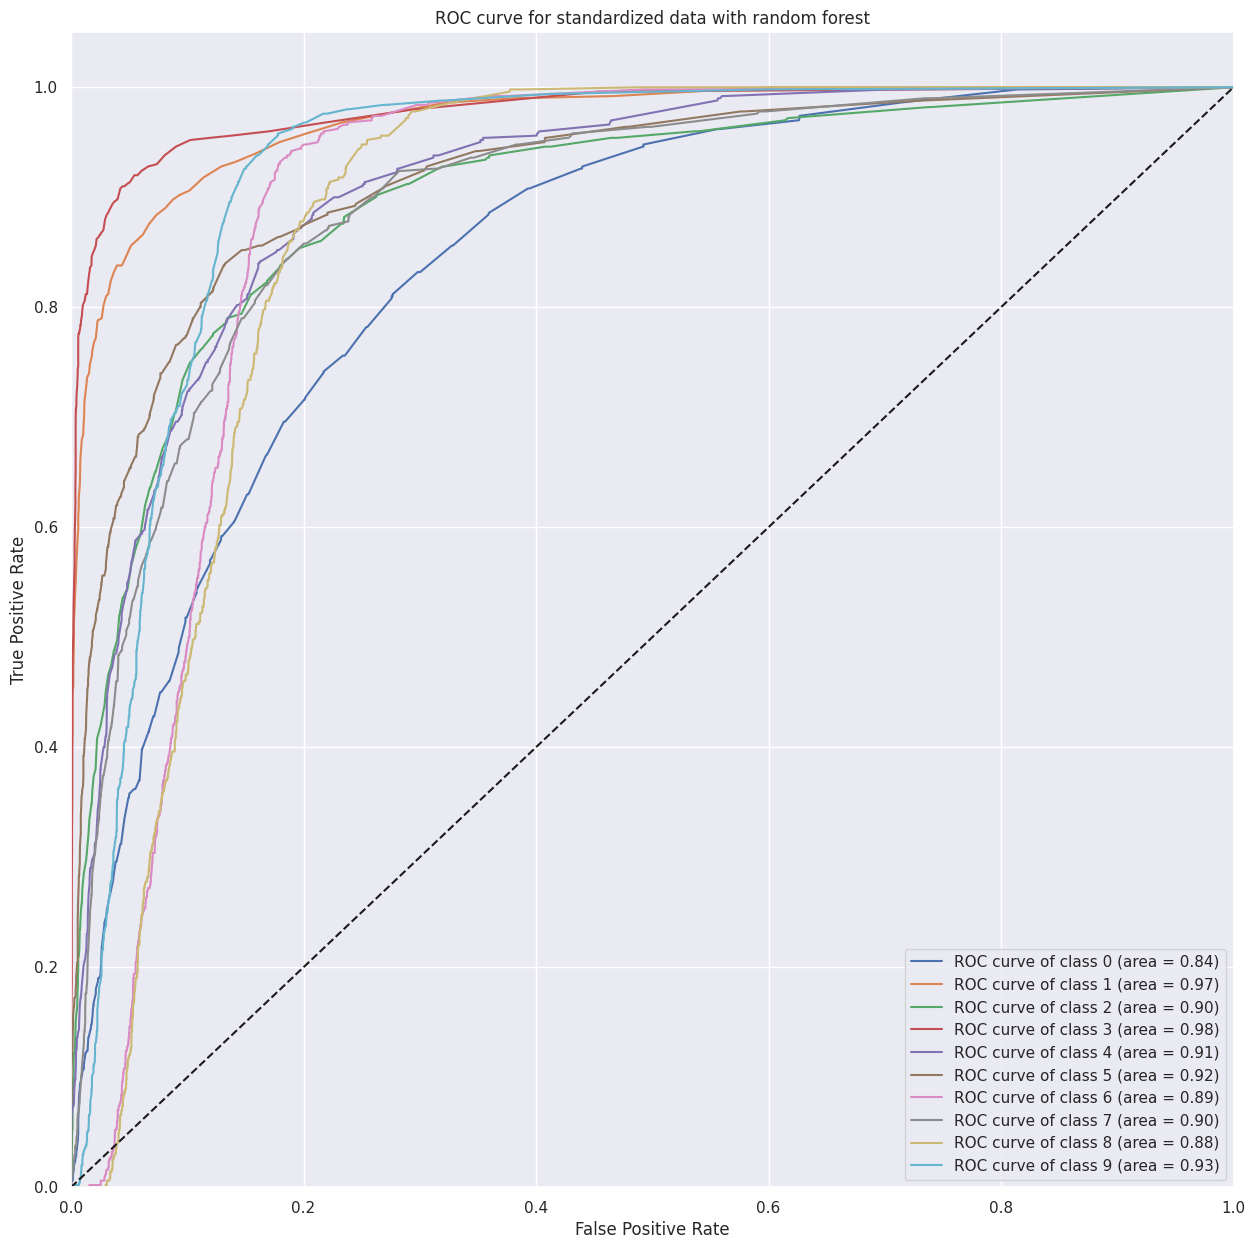

In [ ]:
#plot roc curve
plt.figure()
for i in range(10):
    plt.plot(fpr_std[i], tpr_std[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_std[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for standardized data with random forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#search combination among these
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 15, 20],
    'max_features': ['sqrt', 0.01],
    'bootstrap': [True, False],
}

In [ ]:
clf_cv = RandomForestClassifier(random_state=seed)

In [ ]:
#set criterion to desired roc_auc_ovr
grid_search = GridSearchCV(estimator=clf_cv, param_grid=param_grid, cv=5, scoring='roc_auc_ovr', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12501586),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 15, 20],
                         'max_features': ['sqrt', 0.01],
                         'n_estimators': [200, 300, 400]},
             scoring='roc_auc_ovr', verbose=2)

In [ ]:
#check best predictor and its performance
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 400}
Best score: 0.9266393552812071


In [ ]:
#fitting best param model
best_clf_std = grid_search.best_estimator_
best_clf_std.fit(X_train, y_train)
best_y_pred_std = best_clf_std.predict(X_test)

# See the percentage of examples that are correctly classified.
accuracy = metrics.accuracy_score(y_test, best_y_pred_std) 
print("Accuracy = {:0.2f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(y_test, best_y_pred_std)
print("Confusion matrix = ")
print(conf_matrix)

Accuracy = 55.96%
Confusion matrix = 
[[183   2  11   2  58  16  45  48  25 110]
 [ 13 366  30  38  20  23   0   9   0   1]
 [ 23  42 255   9  60  29   2  54   0  26]
 [ 15  15  11 420   1  13   0  23   0   2]
 [ 30   4  26   0 294   8   5  24  11  98]
 [ 22  12  31   2  10 312  11  75   8  17]
 [ 20   0   1   0   6   5 182   4 255  27]
 [ 10   9  58  22  30  69  15 262   5  20]
 [ 11   0   1   0   3   3 262   1 161  58]
 [ 40   1   6   2  31   3  16   6  32 363]]


In [ ]:
#prob distribution for best prediction
best_pred_probs_std = best_clf_std.predict_proba(X_test)

In [ ]:
best_fpr_std, best_tpr_std, best_roc_auc_std = roc_curve_ovr(best_pred_probs_std, y_test)

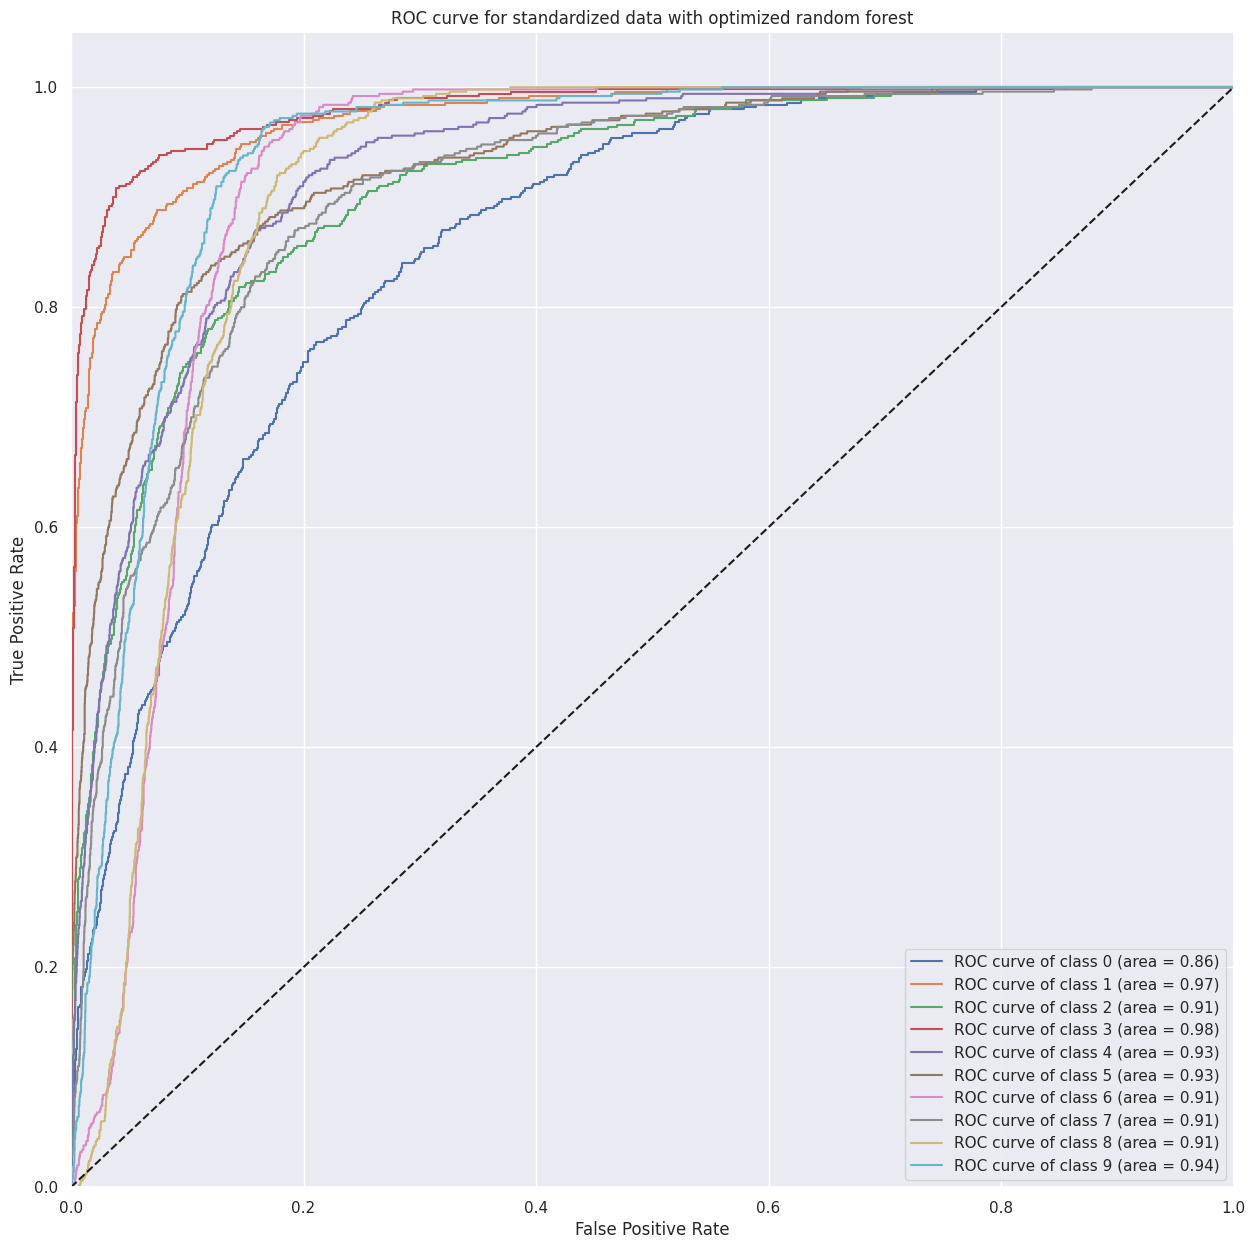

In [ ]:
#plot roc curve 
plt.figure()
for i in range(10):
    plt.plot(best_fpr_std[i], best_tpr_std[i], 
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, best_roc_auc_std[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for standardized data with optimized random forest')
plt.legend(loc="lower right")
plt.show()

### PCA data

In [ ]:
clf_cv_pca = RandomForestClassifier(max_features='sqrt', bootstrap=True, random_state=seed)

In [ ]:
param_grid_pca = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 15, 20],
}

In [ ]:
grid_search_pca = GridSearchCV(estimator=clf_cv_pca, param_grid=param_grid_pca, cv=5, scoring='roc_auc_ovr', verbose=2, n_jobs=-1)

In [ ]:
grid_search_pca.fit(X_train_pca, y_train)
print("Best hyperparameters:", grid_search_pca.best_params_)
print("Best score:", grid_search_pca.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'max_depth': 10, 'n_estimators': 400}
Best score: 0.8532754567901234


In [ ]:
#fitting best param model
best_clf_pca = grid_search_pca.best_estimator_
best_clf_pca.fit(X_train_pca, y_train)
best_y_pred_pca = best_clf_pca.predict(X_test_pca)

# See the percentage of examples that are correctly classified.
accuracy = metrics.accuracy_score(y_test, best_y_pred_pca) 
print("Accuracy = {:0.2f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(y_test, best_y_pred_pca)
print("Confusion matrix = ")
print(conf_matrix)

Accuracy = 40.04%
Confusion matrix = 
[[ 96  27  16   0  66  65  54  59  19  98]
 [ 26 254  60  63  28  46   0  18   0   5]
 [ 16  87 159   8  68  75   5  67   1  14]
 [ 12  21  11 405   5  17   0  25   0   4]
 [ 21  36  63   0 208  37  12  44   7  72]
 [ 55  65  45   4  50 134  34  63   8  42]
 [ 11   0   2   0  11  15 259   7 146  49]
 [ 11  17  73  44  48  62  39 183   3  20]
 [ 24   0   4   0   9  14 273   4 111  61]
 [ 75   9  16   2  86  35  28  32  24 193]]


In [ ]:
#prob distribution for best prediction
best_pred_probs_pca = best_clf_pca.predict_proba(X_test_pca)

In [ ]:
best_fpr_pca, best_tpr_pca, best_roc_auc_pca = roc_curve_ovr(best_pred_probs_pca, y_test)

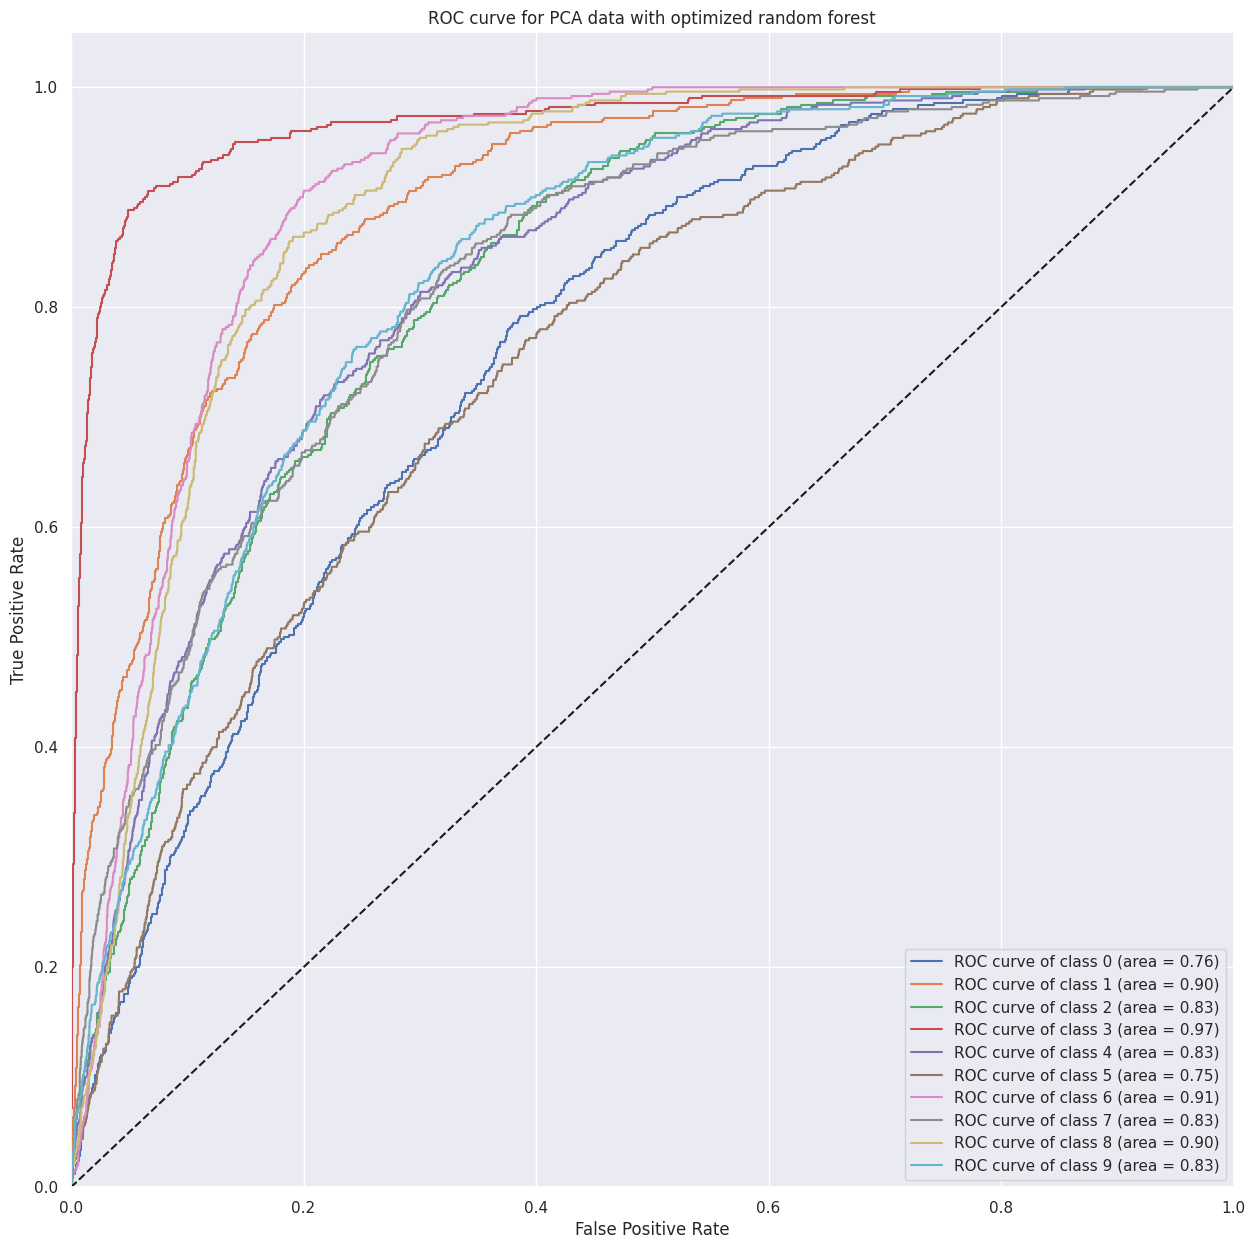

In [ ]:
plt.figure()
for i in range(10):
    plt.plot(best_fpr_pca[i], best_tpr_pca[i], 
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, best_roc_auc_pca[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for PCA data with optimized random forest')
plt.legend(loc="lower right")
plt.show()